In [6]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('TrainingSamoCro.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # staviti -1 za CPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# import the needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image

train_data_dir = 'TrainingSamoCro' #data training path

epochs = 20 #number of training epoch
batch_size = 10 #training batch size


list=[]
import os, shutil
for item in os.listdir(train_data_dir):
    s = os.path.join(train_data_dir, item)
    list.append(item)


# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)


# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label

Found 1512 images belonging to 8 classes.


In [37]:
#testing_data_dir = 'Test/TestGer' #data testing path
#testing_data_dir = 'Test/TestCro' #data testing path
#testing_data_dir = 'Test/TestFra' #data testing path
#testing_data_dir = 'Test/TestBel' #data testing path
testing_data_dir = 'Test/TestSwe' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 498 images belonging to 8 classes.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_35 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_36 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

In [12]:
#Cro + Cro
import matplotlib.pyplot as plt
CroCro = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=10,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/10
  7/152 [>.............................] - ETA: 2s - loss: 4.9723e-04 - accuracy: 1.0000

/tmp/ipykernel_1638184/1551426499.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CroCro = model.fit_generator(


152/152 [==============================] - 3s 19ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0134 - val_accuracy: 0.9968
Epoch 2/10
152/152 [==============================] - 3s 20ms/step - loss: 2.2656e-04 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9968
Epoch 3/10
152/152 [==============================] - 3s 19ms/step - loss: 1.2064e-04 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9968
Epoch 4/10
152/152 [==============================] - 3s 20ms/step - loss: 3.1587e-05 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9952
Epoch 5/10
152/152 [==============================] - 3s 20ms/step - loss: 3.5076e-05 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9968
Epoch 6/10
152/152 [==============================] - 3s 19ms/step - loss: 1.9127e-05 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9968
Epoch 7/10
152/152 [==============================] - 3s 19ms/step - loss: 2.0138e-05 - accuracy: 1.0000 - val_loss: 0.0120 - val_acc

In [13]:
best_val_accuracy_Cro = max(CroCro.history['val_accuracy'])
print('val: ', best_val_accuracy_Cro)


test_loss_cro, test_accuracy_cro = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_cro)
print("Test Accuracy:", test_accuracy_cro)

val:  0.9968253970146179
64/64 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9968
Test Loss: 0.01075782347470522
Test Accuracy: 0.9968454241752625


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


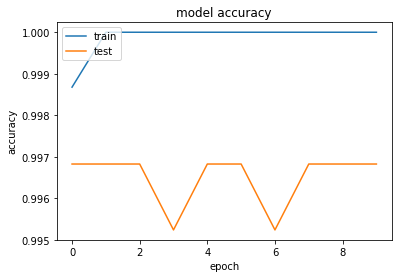

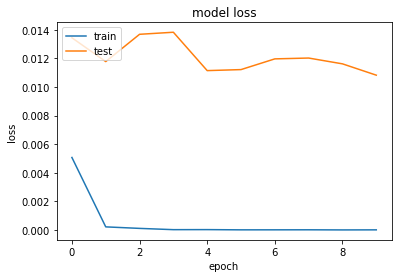

In [14]:
#Cro + Cro
# list all data in history
print(CroCro.history.keys())
# summarize history for accuracy
plt.plot(CroCro.history['accuracy'])
plt.plot(CroCro.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CroCro.history['loss'])
plt.plot(CroCro.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#Cro + Ger
import matplotlib.pyplot as plt
CroGer = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=10,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/10


/tmp/ipykernel_1638184/3349152075.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CroGer = model.fit_generator(


152/152 [==============================] - 6s 31ms/step - loss: 0.5416 - accuracy: 0.8519 - val_loss: 2.9415 - val_accuracy: 0.0267
Epoch 2/10
152/152 [==============================] - 4s 27ms/step - loss: 0.1168 - accuracy: 0.9702 - val_loss: 1.4644 - val_accuracy: 0.4774
Epoch 3/10
152/152 [==============================] - 5s 34ms/step - loss: 0.0604 - accuracy: 0.9835 - val_loss: 0.5406 - val_accuracy: 0.8640
Epoch 4/10
152/152 [==============================] - 4s 27ms/step - loss: 0.0275 - accuracy: 0.9894 - val_loss: 0.8050 - val_accuracy: 0.7767
Epoch 5/10
152/152 [==============================] - 4s 29ms/step - loss: 0.0215 - accuracy: 0.9921 - val_loss: 0.4486 - val_accuracy: 0.8709
Epoch 6/10
152/152 [==============================] - 4s 28ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 1.1456 - val_accuracy: 0.7808
Epoch 7/10
152/152 [==============================] - 4s 28ms/step - loss: 0.0723 - accuracy: 0.9868 - val_loss: 2.8715 - val_accuracy: 0.5240
Epoch 8/10

In [18]:
best_val_accuracy_Ger = max(CroGer.history['val_accuracy'])
print('val: ', best_val_accuracy_Ger)


test_loss_ger, test_accuracy_ger = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_ger)
print("Test Accuracy:", test_accuracy_ger)

val:  0.8866438269615173
293/293 [==============================] - 2s 6ms/step - loss: 0.4091 - accuracy: 0.8866
Test Loss: 0.40913036465644836
Test Accuracy: 0.8866119980812073


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


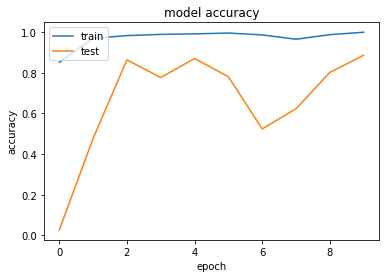

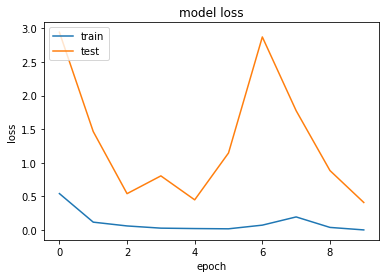

In [19]:
#Cro + Ger
# list all data in history
print(CroGer.history.keys())
# summarize history for accuracy
plt.plot(CroGer.history['accuracy'])
plt.plot(CroGer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CroGer.history['loss'])
plt.plot(CroGer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#Cro + Fra
import matplotlib.pyplot as plt
CroFra = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=15,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/15


/tmp/ipykernel_1638184/1797968907.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CroFra = model.fit_generator(


152/152 [==============================] - 4s 20ms/step - loss: 0.4950 - accuracy: 0.8604 - val_loss: 3.2504 - val_accuracy: 0.0583
Epoch 2/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0882 - accuracy: 0.9782 - val_loss: 2.5424 - val_accuracy: 0.1667
Epoch 3/15
152/152 [==============================] - 3s 19ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 1.2626 - val_accuracy: 0.4833
Epoch 4/15
152/152 [==============================] - 3s 19ms/step - loss: 0.0316 - accuracy: 0.9894 - val_loss: 1.1222 - val_accuracy: 0.7000
Epoch 5/15
152/152 [==============================] - 3s 19ms/step - loss: 0.0963 - accuracy: 0.9769 - val_loss: 1.1054 - val_accuracy: 0.6250
Epoch 6/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 1.5931 - val_accuracy: 0.7583
Epoch 7/15
152/152 [==============================] - 3s 18ms/step - loss: 0.0261 - accuracy: 0.9954 - val_loss: 1.7054 - val_accuracy: 0.6083
Epoch 8/15

In [30]:
best_val_accuracy_Fra = max(CroFra.history['val_accuracy'])
print('val: ', best_val_accuracy_Fra)


test_loss_fra, test_accuracy_fra = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_fra)
print("Test Accuracy:", test_accuracy_fra)

val:  0.8500000238418579
13/13 [==============================] - 0s 8ms/step - loss: 0.7982 - accuracy: 0.8525
Test Loss: 0.7981882691383362
Test Accuracy: 0.8524590134620667


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


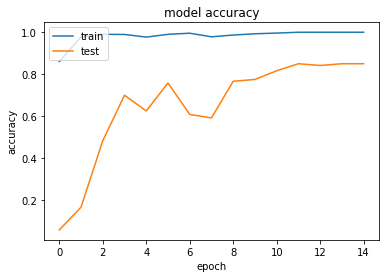

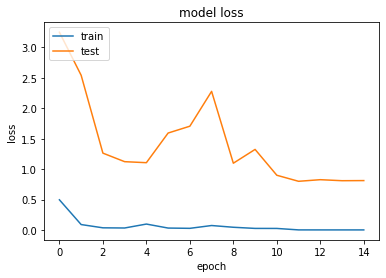

In [31]:
#Cro + Fra
# list all data in history
print(CroFra.history.keys())
# summarize history for accuracy
plt.plot(CroFra.history['accuracy'])
plt.plot(CroFra.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CroFra.history['loss'])
plt.plot(CroFra.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
#Cro + Bel
import matplotlib.pyplot as plt
CroBel = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=10,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/10


/tmp/ipykernel_1638184/3545775122.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CroBel = model.fit_generator(


152/152 [==============================] - 4s 22ms/step - loss: 0.5736 - accuracy: 0.8393 - val_loss: 1.5299 - val_accuracy: 0.4234
Epoch 2/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0907 - accuracy: 0.9663 - val_loss: 1.9099 - val_accuracy: 0.5957
Epoch 3/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0439 - accuracy: 0.9854 - val_loss: 0.1968 - val_accuracy: 0.9191
Epoch 4/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.3503 - val_accuracy: 0.9234
Epoch 5/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0438 - accuracy: 0.9888 - val_loss: 0.3721 - val_accuracy: 0.8979
Epoch 6/10
152/152 [==============================] - 3s 19ms/step - loss: 0.0678 - accuracy: 0.9808 - val_loss: 0.8337 - val_accuracy: 0.9043
Epoch 7/10
152/152 [==============================] - 3s 20ms/step - loss: 0.1596 - accuracy: 0.9583 - val_loss: 2.9187 - val_accuracy: 0.7000
Epoch 8/10

In [35]:
best_val_accuracy_Bel = max(CroBel.history['val_accuracy'])
print('val: ', best_val_accuracy_Bel)


test_loss_bel, test_accuracy_bel = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_bel)
print("Test Accuracy:", test_accuracy_bel)

val:  0.9425531625747681
48/48 [==============================] - 0s 5ms/step - loss: 0.3102 - accuracy: 0.9430
Test Loss: 0.31024929881095886
Test Accuracy: 0.9430379867553711


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


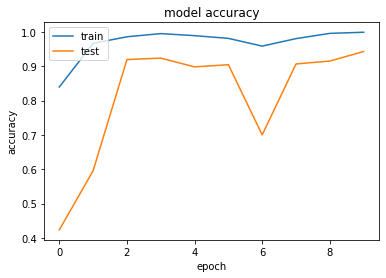

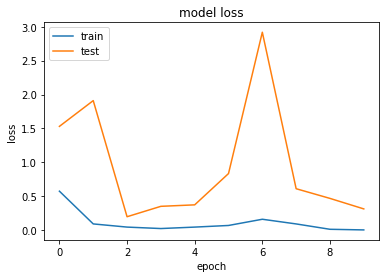

In [36]:
#Cro + Bel
# list all data in history
print(CroBel.history.keys())
# summarize history for accuracy
plt.plot(CroBel.history['accuracy'])
plt.plot(CroBel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CroBel.history['loss'])
plt.plot(CroBel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
#Cro + Swe
import matplotlib.pyplot as plt
CroSwe = model.fit_generator(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    #steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=10,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size)
    )

Epoch 1/10
  4/152 [..............................] - ETA: 2s - loss: 1.9291e-04 - accuracy: 1.0000

/tmp/ipykernel_1638184/3250470688.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CroSwe = model.fit_generator(


152/152 [==============================] - 3s 19ms/step - loss: 0.0303 - accuracy: 0.9947 - val_loss: 3.1263 - val_accuracy: 0.5306
Epoch 2/10
152/152 [==============================] - 3s 19ms/step - loss: 0.0563 - accuracy: 0.9888 - val_loss: 1.4993 - val_accuracy: 0.6939
Epoch 3/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0454 - accuracy: 0.9894 - val_loss: 0.6674 - val_accuracy: 0.8714
Epoch 4/10
152/152 [==============================] - 3s 21ms/step - loss: 0.0226 - accuracy: 0.9940 - val_loss: 2.0719 - val_accuracy: 0.6633
Epoch 5/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 1.3469 - val_accuracy: 0.7837
Epoch 6/10
152/152 [==============================] - 3s 18ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 1.7184 - val_accuracy: 0.7245
Epoch 7/10
152/152 [==============================] - 3s 20ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.7924 - val_accuracy: 0.8449
Epoch 8/10

In [42]:
best_val_accuracy_Swe = max(CroSwe.history['val_accuracy'])
print('val: ', best_val_accuracy_Swe)


test_loss_swe, test_accuracy_swe = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_swe)
print("Test Accuracy:", test_accuracy_swe)

val:  0.8714285492897034
50/50 [==============================] - 0s 6ms/step - loss: 0.9835 - accuracy: 0.8233
Test Loss: 0.9834782481193542
Test Accuracy: 0.823293149471283


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


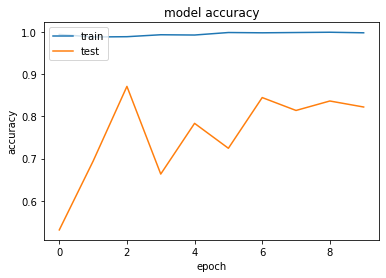

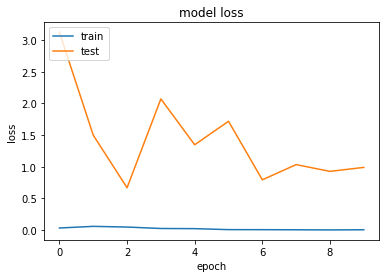

In [43]:
#Cro + Bel
# list all data in history
print(CroSwe.history.keys())
# summarize history for accuracy
plt.plot(CroSwe.history['accuracy'])
plt.plot(CroSwe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CroSwe.history['loss'])
plt.plot(CroSwe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:

import pandas as pd

best_results = []


best_results.append({'Model': 'CroCro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Model': 'GerGer', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Model': 'GerBel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Model': 'GerSwe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Model': 'GerFra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df)   

    Model  Best Val_Accuracy  Best Test Accuracy
0  CroCro           0.996825            0.996845
1  GerGer           0.886644            0.886612
2  GerBel           0.942553            0.943038
3  GerSwe           0.871429            0.823293
4  GerFra           0.850000            0.852459
